# Digit Recognizer
https://www.kaggle.com/competitions/digit-recognizer/overview

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

In [172]:
# Read the CSV digit recognizer train csv file
train = pd.read_csv('datasets/digit-recognizer/train.csv')
test = pd.read_csv('datasets/digit-recognizer/test.csv')

In [173]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
train.shape

(42000, 785)

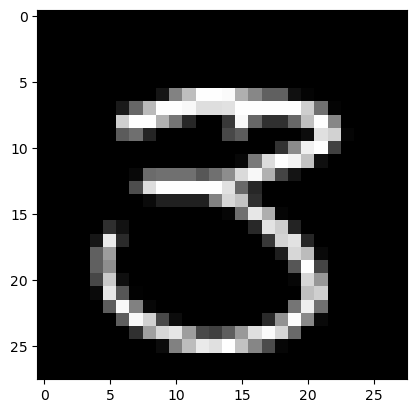

In [175]:
# let's plot the first image in train


# reshape the image to 28x28
image = np.array(train.iloc[7, 1:]).reshape(28, 28)

# let's plot the first image in train
plt.imshow(image, cmap='gray')

<AxesSubplot:>

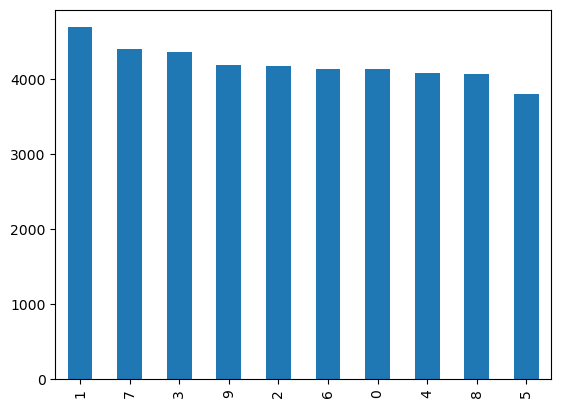

In [176]:
# plot the value counts of the labels
train['label'].value_counts().plot(kind='bar')

In [177]:
labels = train['label']
features = train.drop('label', axis=1)

In [178]:
features = torch.tensor(features.values, dtype=torch.float32)
labels = torch.tensor(labels.values, dtype=torch.int64)

In [179]:
# create a validation set
num_training = 30000
train_features, val_features = features[:num_training], features[num_training:]
train_labels, val_labels = labels[:num_training], labels[num_training:]

In [180]:
train_features.shape, train_labels.shape

(torch.Size([30000, 784]), torch.Size([30000]))

In [181]:
# create a small MLP model

num_features = 784
num_classes = 10
num_neurons = 32

model = torch.nn.Sequential(
    torch.nn.Linear(num_features, num_neurons),
    torch.nn.Tanh(),
    torch.nn.Linear(num_neurons, num_classes)
)

In [182]:
# define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
losses = []
num_iters = 100

# train the model
for i in range(num_iters):
    # zero the parameter gradients
    optimizer.zero_grad()

    # generate a random batch
    batch_size = 32
    batch_indices = np.random.choice(num_training, batch_size)
    train_features_batch = train_features[batch_indices]
    train_labels_batch = train_labels[batch_indices]

    # print(f'train_features_batch.shape: {train_features_batch.shape}')

    # forward + backward + optimize
    x = train_features_batch
    for layer in model:
        x = layer(x)
    
    loss = criterion(x, train_labels_batch)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    # break   # remove this line to train the model


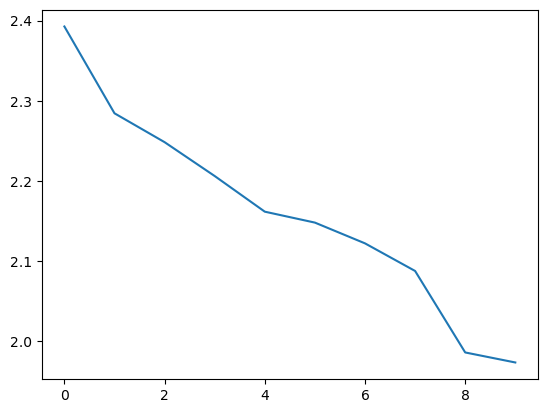

In [183]:
# plot the loss
num_batch_to_avg = 10
plt.plot(torch.tensor(losses).view(-1, num_batch_to_avg).mean(1))

In [184]:
# set the model to evaluation mode
model.eval()

# evaluate the model on the validation set
x = val_features
for layer in model:
    x = layer(x)
val_outputs = x

# get the predictions
_, val_preds = torch.max(val_outputs, 1)

# calculate the accuracy
accuracy = (val_preds == val_labels).sum().item() / val_labels.shape[0]

print('Validation accuracy: %.2f' % accuracy)

# evaluate the model on the training set
x = train_features
for layer in model:
    x = layer(x)
train_outputs = x

# get the predictions
_, train_preds = torch.max(train_outputs, 1)

# calculate the accuracy
accuracy = (train_preds == train_labels).sum().item() / train_labels.shape[0]

print('Training accuracy: %.2f' % accuracy)

Validation accuracy: 0.29
Training accuracy: 0.29


Predicted label: 6




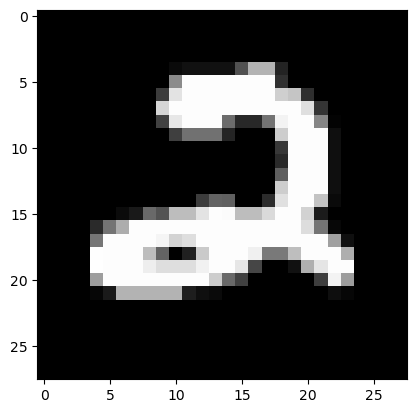

In [185]:
# Let's evaluate the model on the first image of the test set
test_image = test.iloc[0, :].values.reshape(28, 28)
plt.imshow(test_image, cmap='gray')
expected_test_image_label = 2

# convert the test image to a tensor
test_image = test_image.reshape(1, -1)
test_image_tensor = torch.tensor(test_image, dtype=torch.float32)

# evaluate the model on the test image
x = test_image_tensor
for layer in model:
    x = layer(x)

print(f'Predicted label: {torch.max(x, 1).indices.item()}')
print('\n')

predicted_label = torch.max(x, 1).indices.item()

# get the prediction
_, test_image_pred = torch.max(x, 0)

# _, test_image_pred
# print('Expected label: %d, predicted label: %d' % (expected_test_image_label, test_image_pred))

holy crap this is actually working wow. lol only took a couple minutes of work  :D

Predicted label: 0




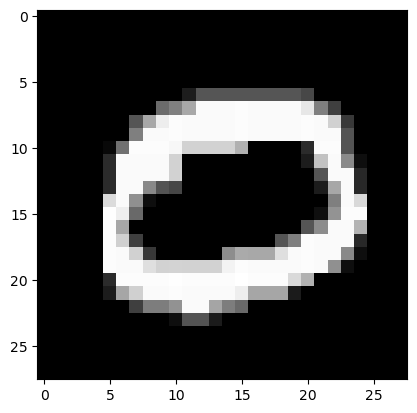

In [186]:
# Let's evaluate the model on the second image of the test set
test_image = test.iloc[1, :].values.reshape(28, 28)
plt.imshow(test_image, cmap='gray')
expected_test_image_label = 0

# convert the test image to a tensor
test_image = test_image.reshape(1, -1)
test_image_tensor = torch.tensor(test_image, dtype=torch.float32)

# evaluate the model on the test image
x = test_image_tensor
for layer in model:
    x = layer(x)

print(f'Predicted label: {torch.max(x, 1).indices.item()}')
print('\n')

predicted_label = torch.max(x, 1).indices.item()

# get the prediction
_, test_image_pred = torch.max(x, 0)

# _, test_image_pred
# print('Expected label: %d, predicted label: %d' % (expected_test_image_label, test_image_pred))

Predicted label: 0




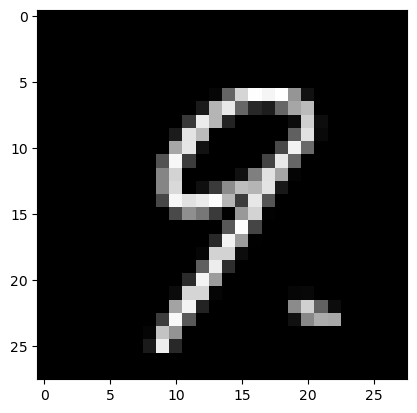

In [187]:
# Let's evaluate the model on the first image of the test set
test_image = test.iloc[2, :].values.reshape(28, 28)
plt.imshow(test_image, cmap='gray')
expected_test_image_label = 9

# convert the test image to a tensor
test_image = test_image.reshape(1, -1)
test_image_tensor = torch.tensor(test_image, dtype=torch.float32)

# evaluate the model on the test image
x = test_image_tensor
for layer in model:
    x = layer(x)

print(f'Predicted label: {torch.max(x, 1).indices.item()}')
print('\n')

predicted_label = torch.max(x, 1).indices.item()

# get the prediction
_, test_image_pred = torch.max(x, 0)

# _, test_image_pred
# print('Expected label: %d, predicted label: %d' % (expected_test_image_label, test_image_pred))

In [188]:
# Let's put the model in training mode again
model.train()

# Let's train the model on the entire training set
# define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
losses = []
num_iters = 100

# train the model
for i in range(num_iters):
    # zero the parameter gradients
    optimizer.zero_grad()

    # generate a random batch
    batch_size = 32
    batch_indices = np.random.choice(features.shape[0]-1, batch_size)
    features_batch = features[batch_indices]
    labels_batch = labels[batch_indices]

    # forward + backward + optimize
    x = features_batch
    for layer in model:
        x = layer(x)
    
    loss = criterion(x, labels_batch)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())


In [189]:
# Put the model in evaluation mode
model.eval()

# evaluate the model on the test set

# test.head()

x = torch.tensor(test.values, dtype=torch.float32)

for layer in model:
    x = layer(x)

# get the predictions
_, test_preds = torch.max(x, 1)

# create the submission file
submission = pd.DataFrame({'ImageId': range(1, test_preds.shape[0]+1), 'Label': test_preds})
submission.to_csv('digit-recognition-submission.csv', index=False)


# Convolutional Neural Network
- Let's try using a convolutional neural network to classify the digits instead of a simple MLP neural network
- With an MLP, we were able to achieve a 91% accuracy on the test set

In [190]:
# unflatten the images for the convolution
train_features = train_features.view(train_features.shape[0], 1, 28, 28)

print(train_features.shape, train_labels.shape)

torch.Size([30000, 1, 28, 28]) torch.Size([30000])


In [191]:
# model using convolutions
model = torch.nn.Sequential(
    torch.nn.Conv2d(1, 32, kernel_size=3, padding=1),
    torch.nn.ReLU(),
    torch.nn.Conv2d(32, 32, kernel_size=3, padding=1),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2),
    torch.nn.Dropout(0.25),
    torch.nn.Flatten(),
    torch.nn.Linear(32*14*14, 128),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(128, 10)
)

In [192]:
ex_train_images = train_features[1:3].view(-1, 1, 28, 28)
print(ex_train_images.shape)
x = ex_train_images
print(x.shape)
for layer in model:
    x = layer(x)
    print(layer.__class__.__name__, x.shape)

print(x)
print(torch.max(x, 1))


torch.Size([2, 1, 28, 28])
torch.Size([2, 1, 28, 28])
Conv2d torch.Size([2, 32, 28, 28])
ReLU torch.Size([2, 32, 28, 28])
Conv2d torch.Size([2, 32, 28, 28])
ReLU torch.Size([2, 32, 28, 28])
MaxPool2d torch.Size([2, 32, 14, 14])
Dropout torch.Size([2, 32, 14, 14])
Flatten torch.Size([2, 6272])
Linear torch.Size([2, 128])
ReLU torch.Size([2, 128])
Dropout torch.Size([2, 128])
Linear torch.Size([2, 10])
tensor([[  4.4158,  -6.1268,  12.9944,   9.6315,   4.4046,  -7.0994,   1.3950,
           1.6869,   0.2352,   6.4379],
        [  2.6201, -11.8283,   1.7669,   8.4399,  -1.2597,  -1.8093,   0.1074,
           1.8927,   5.6209,   1.2397]], grad_fn=<AddmmBackward0>)
torch.return_types.max(
values=tensor([12.9944,  8.4399], grad_fn=<MaxBackward0>),
indices=tensor([2, 3]))


In [193]:
model_predictions = torch.max(x, 1).indices
print(f'Model predictions: {model_predictions}')

first_prediction = model_predictions[0]
print(f'First prediction: {first_prediction}')

Model predictions: tensor([2, 3])
First prediction: 2


In [194]:
# train model on training set only
model.train()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
losses = []
num_iters = 100

# train the model
for i in range(num_iters):
    # zero the parameter gradients
    optimizer.zero_grad()

    # generate a random batch
    batch_size = 32
    batch_indices = np.random.choice(train_features.shape[0]-1, batch_size)
    features_batch = train_features[batch_indices]
    labels_batch = train_labels[batch_indices]

    # forward + backward + optimize
    x = features_batch
    for layer in model:
        x = layer(x)

    loss = criterion(x, labels_batch)
    losses.append(loss)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    # break


torch.Size([1, 10])
Predicted label: tensor([3])


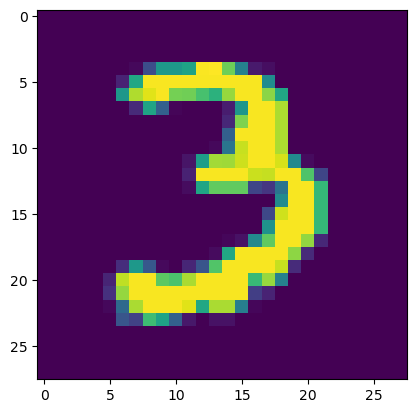

In [195]:
# let's visually test our model on a few images

img1 = train_features[9].view(28, 28)

img1.shape

plt.imshow(img1)    # Expected label

x = img1.view(1, 1, 28, 28)
for layer in model:
    x = layer(x)

print(x.shape)
predicted = torch.max(x, 1)
print(f'Predicted label: {predicted.indices}')


ok the model seems to do well when I manually tested it on a few images, let's measure its validation accuracy

In [196]:
# Evaluate the model on the validation set
# set the model to evaluation mode
model.eval()

val_features = val_features.view(-1, 1, 28, 28)

# evaluate the model on the validation set
x = val_features
for layer in model:
    x = layer(x)
val_outputs = x

# get the predictions
_, val_preds = torch.max(val_outputs, 1)

# calculate the accuracy
accuracy = (val_preds == val_labels).sum().item() / val_labels.shape[0]

print('Validation accuracy: %.2f' % accuracy)

# evaluate the model on the training set
x = train_features
for layer in model:
    x = layer(x)
train_outputs = x

# get the predictions
_, train_preds = torch.max(train_outputs, 1)

# calculate the accuracy
accuracy = (train_preds == train_labels).sum().item() / train_labels.shape[0]

print('Training accuracy: %.2f' % accuracy)

Validation accuracy: 0.85
Training accuracy: 0.85


Validation accuracy: 0.97
Training accuracy: 0.98

ok wow, I guess CNNs do work :D  Time to train this model on the entire training set and then make predictions on the test set

In [197]:
features = features.view(-1, 1, 28, 28)
features.shape, labels.shape

(torch.Size([42000, 1, 28, 28]), torch.Size([42000]))

In [202]:
# Set model back in train mode and train on all supervised data available
model.train()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
losses = []
num_iters = 10000

# train the model
for i in range(num_iters):
    # zero the parameter gradients
    optimizer.zero_grad()

    # generate a random batch
    batch_size = 32
    batch_indices = np.random.choice(features.shape[0]-1, batch_size)
    features_batch = features[batch_indices]
    labels_batch = labels[batch_indices]

    # forward + backward + optimize
    x = features_batch
    for layer in model:
        x = layer(x)

    loss = criterion(x, labels_batch)
    losses.append(loss)
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
        print(f'Loss: {loss.item()}')

    losses.append(loss.item())

    # break


Loss: 0.7387006282806396
Loss: 0.5714221596717834
Loss: 0.7454049587249756
Loss: 0.49209538102149963
Loss: 0.48433998227119446
Loss: 0.14400362968444824
Loss: 0.19982841610908508
Loss: 0.06586997956037521
Loss: 0.1266169548034668
Loss: 0.17291375994682312
Loss: 0.14423373341560364
Loss: 0.1501835137605667
Loss: 0.020249122753739357
Loss: 0.3436819911003113
Loss: 0.046179961413145065
Loss: 0.4328920841217041
Loss: 0.027121389284729958
Loss: 0.033034633845090866
Loss: 0.14813999831676483
Loss: 0.17702451348304749
Loss: 0.04787113890051842
Loss: 0.04094350337982178
Loss: 0.15767671167850494
Loss: 0.038933150470256805
Loss: 0.04975980520248413
Loss: 0.05985068157315254
Loss: 0.14827103912830353
Loss: 0.1697242259979248
Loss: 0.04677714407444
Loss: 0.010043587535619736
Loss: 0.04219239205121994
Loss: 0.15698543190956116
Loss: 0.04667358845472336
Loss: 0.0645218938589096
Loss: 0.026282303035259247
Loss: 0.09759469330310822
Loss: 0.026776961982250214
Loss: 0.036874473094940186
Loss: 0.2435619

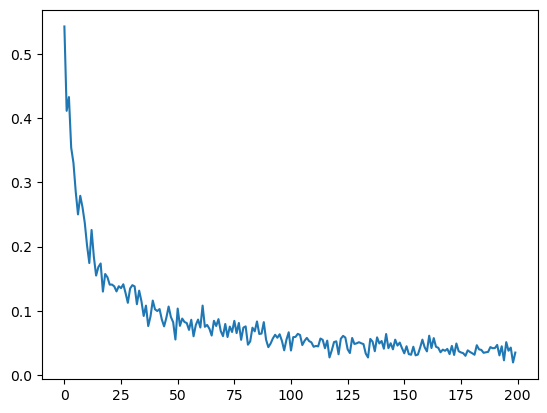

In [203]:
# Plot the mean loss over a couple batches
num_batch_to_avg = 100
plt.plot(torch.tensor(losses).view(-1, num_batch_to_avg).mean(1))

In [204]:
# test = test.values
# test.dtype
# test = test.view(-1, 1, 28, 28)

test_features = torch.tensor(test.values, dtype=torch.float32)
test_features.shape
test_features = test_features.view(-1, 1, 28, 28)

In [205]:
# Put the model in evaluation mode for the test set
model.eval()

x = test_features

for layer in model:
    x = layer(x)

# get the predictions
_, test_preds = torch.max(x, 1)

# create the submission file
submission = pd.DataFrame({'ImageId': range(1, test_preds.shape[0]+1), 'Label': test_preds})
submission.to_csv('digit-recognition-submission.csv', index=False)
